# Robotics Applications of ODE Solving with Julia

Welcome to this computational mathematics practical class notebook! Today, we will explore how Julia can be used to solve ordinary differential equations in the context of robotics. Our example model—a simple *double integrator*—can represent the dynamics of a robot moving along a straight line. We will use DifferentialEquations.jl along with several ODE solvers and compare their performance and behavior.

**Learning Objectives:**
- Learn how to set up a robotics simulation using ODE models in Julia.
- Experiment with different ODE solvers (e.g., Tsit5, Rodas5, CVODE_BDF) and see how they differ in handling non‑stiff and stiff systems.
- Understand the impact of solver choice on accuracy, stability, and execution time.

This notebook is designed to run on Binder
[Binder Link](https://mybinder.org/).

Let's get started!

In [3]:
##############################
# Package Setup
##############################

using Pkg
# If running for the first time on Binder, uncomment the following lines:
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

using DifferentialEquations
using Plots

# Set a default plot theme
default(; lw=2, size=(600,400))


  Installing known registries into `C:\Users\olgap\.julia`
       Added `General` registry to C:\Users\olgap\.julia\registries
    Updating registry at `C:\Users\olgap\.julia\registries\General.toml`
   Resolving package versions...
   Installed OrdinaryDiffEqRKN ─────────────────── v1.1.0
   Installed Preferences ───────────────────────── v1.4.3
   Installed OrdinaryDiffEqRosenbrock ──────────── v1.9.0
   Installed HypergeometricFunctions ───────────── v0.3.28
   Installed StatsFuns ─────────────────────────── v1.4.0
   Installed Accessors ─────────────────────────── v0.1.42
   Installed OrdinaryDiffEqStabilizedRK ────────── v1.1.0
   Installed DifferentialEquations ─────────────── v7.16.1
   Installed AlmostBlockDiagonals ──────────────── v0.1.10
   Installed FastGaussQuadrature ───────────────── v1.0.2
   Installed OrdinaryDiffEqSDIRK ───────────────── v1.3.0
   Installed PDMats ────────────────────────────── v0.11.34
   Installed BoundaryValueDiffEqFIRK ───────────── v1.6.0
   Inst

## 1. Introducing the Robotics Model

In robotics, a common simple model is the **double integrator** which can represent a robot’s linear motion. Here, the state vector is defined as:

- **u[1]:** Position
- **u[2]:** Velocity

The dynamics are given by the equations:

- $$ \frac{d}{dt} (\text{position}) = \text{velocity} $$
- $$ \frac{d}{dt} (\text{velocity}) = -k \times (\text{position}) - c \times (\text{velocity}) $$

where $k$ is the spring coefficient and $c$ is the damping coefficient. This simple model will allow us to explore both non‑stiff and stiff behavior by adjusting the parameters.

In [4]:
##############################
# Define the ODE Model
##############################

# The robot dynamics function for the double integrator
function robot_dynamics!(du, u, p, t)
    # u[1] = position, u[2] = velocity
    du[1] = u[2]                           # d(position)/dt = velocity
    du[2] = -p[1]*u[1] - p[2]*u[2]           # acceleration = -k*position - c*velocity
end

# Initial conditions: robot starts at position 1.0 with zero initial velocity
u0 = [1.0, 0.0]

# Time span for the simulation: 0 to 10 seconds
tspan = (0.0, 10.0)

# Parameters: p = [spring constant, damping coefficient]
p = [2.0, 0.5]

# Create the ODE problem
prob = ODEProblem(robot_dynamics!, u0, tspan, p)


ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 0.0

## 2. Solving the ODE with Different Solvers

DifferentialEquations.jl offers a wide variety of solvers. In this section, we will solve the **double integrator** problem with different solvers and compare the results. You can refer to the [DifferentialEquations.jl Solvers documentation](https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/) for more details.

We will use:

- **Tsit5**: A non‑stiff, explicit Runge‑Kutta method
- **Rodas5**: An implicit method suitable for potentially stiff systems
- **CVODE_BDF**: A solver from the Sundials suite (often used in larger stiff problems)

Feel free to adjust parameters (e.g., increase the damping constant) to see how the solvers respond to stiffer dynamics.

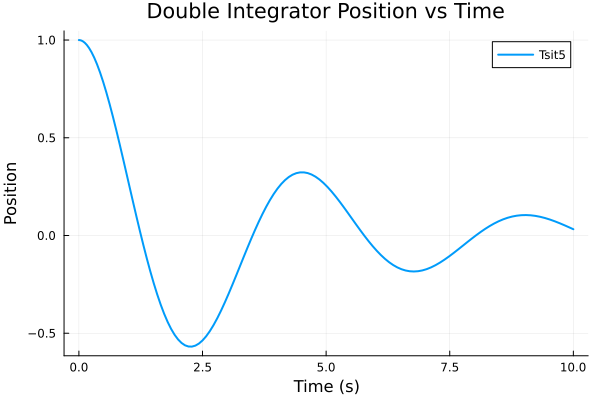

In [5]:
##############################
# Solve using Tsit5 (non-stiff)
##############################

sol_Tsit5 = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plot(sol_Tsit5.t, sol_Tsit5[1,:], label="Tsit5", xlabel="Time (s)", ylabel="Position", 
     title="Double Integrator Position vs Time", lw=2)
display(current())


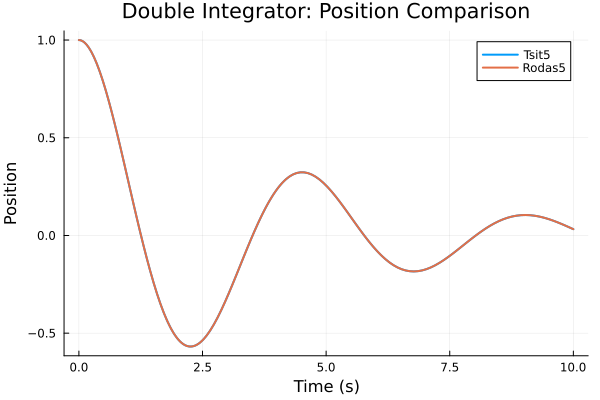

In [6]:
##############################
# Solve using Rodas5 (for stiff systems)
##############################

sol_Rodas5 = solve(prob, Rodas5(), reltol=1e-8, abstol=1e-8)

# Plotting on the same figure for comparison
plot(sol_Tsit5.t, sol_Tsit5[1,:], label="Tsit5", xlabel="Time (s)", ylabel="Position", 
     title="Double Integrator: Position Comparison", lw=2)
plot!(sol_Rodas5.t, sol_Rodas5[1,:], label="Rodas5", lw=2)
display(current())


In [8]:
##############################
# Solve using CVODE_BDF (from Sundials, for stiff problems)
##############################

sol_CVODE = solve(prob, CVODE_BDF(), reltol=1e-8, abstol=1e-8)

# Add the solution from CVODE_BDF on our comparison plot
plot!(sol_CVODE.t, sol_CVODE[1,:], label="CVODE_BDF", linestyle=:dash, lw=2)
display(current())


UndefVarError: UndefVarError: `CVODE_BDF` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Sundials in the current active module Main

## 3. Experimentation and Analysis

Now it’s your turn to experiment! Try the following tasks:

1. **Vary the Parameters:** Increase the damping coefficient (or spring constant) to push the model towards stiffness. Notice how the solutions change and how some solvers handle the stiff dynamics better than others.

2. **Solver Tolerances:** Modify the relative (`reltol`) and absolute (`abstol`) tolerances when calling `solve()`. Observe the changes in accuracy and computation time.

3. **Timing Analysis:** Use the `@time` macro to measure how long each solver takes. For example:

   ```julia
   @time solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
   @time solve(prob, Rodas5(), reltol=1e-8, abstol=1e-8)
   ```

4. **Discussion:** Answer the following in your own words in a Markdown cell below (or as instructor-led discussion):
   - How does the choice of solver affect the solution for non-stiff vs. stiff regimes?
   - What trade-offs do you observe in terms of computation time, accuracy, and stability?

For more details on the solvers and their appropriate use cases, visit the [DifferentialEquations.jl Solvers page](https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/).

## 4. Further Exploration

Once you’re comfortable with this model, consider extending the notebook by:

- Modeling a multi‑link robotic arm, where the state vector includes joint angles and angular velocities.
- Incorporating feedback control (such as a PID controller) into the ODE to simulate closed‑loop dynamics.
- Exploring event handling (for example, when the robot reaches a target or collides with an object) using callbacks in DifferentialEquations.jl.

These exercises will deepen your understanding of how ODE solvers behave in a robotics context and how to choose an appropriate solver for your specific problem.

## 5. Conclusion

In this practical class, you learned how to set up a robotics model in Julia, solve it using multiple ODE solvers, and analyze the impact of solver choice on system behavior. Understanding these differences is important when scaling problems to more complex robotics applications.

Happy coding and exploring!